In [1]:
import pandas as pd

### Load and process sensor readings

In [2]:
sensor_readings = pd.read_csv("speed_readings.csv")
sensor_readings = sensor_readings.pivot(index="Timestamp", columns="sensor_id", values="measurement")
sensor_readings

sensor_id,716328,716331,716337,716339,716554,716571,716939,716941,716942,716943,...,773953,773954,773974,773975,773995,773996,774011,774012,774067,774204
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,66.875000,67.500000,63.125000,64.250000,63.500000,67.000000,53.625000,58.125000,62.125000,55.000,...,55.750000,63.875000,52.125000,64.750000,63.125000,61.375000,67.750000,55.875000,52.500000,64.500000
2012-03-01 00:05:00,67.444444,65.444444,63.777778,66.444444,56.000000,65.888889,59.888889,56.222222,62.000000,50.000,...,60.888889,62.333333,52.333333,62.222222,58.555556,58.666667,64.111111,66.444444,34.666667,66.666667
2012-03-01 00:10:00,65.000000,67.875000,63.875000,64.750000,59.125000,61.375000,56.000000,59.125000,63.125000,54.875,...,62.375000,61.500000,56.125000,63.500000,64.125000,59.500000,67.125000,65.750000,50.000000,56.500000
2012-03-01 00:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2012-03-01 00:20:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-27 23:35:00,66.333333,64.333333,65.777778,63.444444,59.888889,59.555556,53.444444,60.333333,57.000000,53.000,...,62.666667,62.555556,54.777778,64.888889,58.222222,60.444444,66.666667,64.888889,61.777778,65.111111
2012-06-27 23:40:00,63.750000,64.250000,66.125000,63.125000,55.750000,66.750000,56.500000,59.125000,58.125000,51.625,...,62.500000,62.875000,52.500000,63.500000,65.250000,65.125000,65.750000,67.875000,62.625000,60.125000
2012-06-27 23:45:00,66.888889,59.000000,64.444444,64.444444,55.333333,68.333333,52.222222,61.333333,65.333333,55.000,...,59.888889,63.333333,53.222222,64.333333,65.555556,62.888889,67.444444,67.888889,60.333333,64.333333


## Imputation

### Split train/val, and scale

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler
import joblib

def split_scale(measurements, feature, cluster):

    # Step 1: Split the full data (X_seq or X_ori) into train and validation sets
    X_train_full, X_val_full = train_test_split(measurements, test_size=0.2, shuffle = False, random_state=42)

    scaler = StandardScaler()

    # Fit and transform training data
    X_train_full_scaled = X_train_full.copy()
    X_train_full_scaled = scaler.fit_transform(X_train_full)
    X_train_full_scaled = pd.DataFrame(X_train_full_scaled, columns=X_train_full.columns, index=X_train_full.index)

    # Save scaler with specific name for later rescaling
    joblib.dump(scaler, f"{feature}_scaler_{cluster}.pkl")

    # Now, apply ONLY transformation (not fitting) on val data
    X_val_full_scaled = X_val_full.copy()
    X_val_full_scaled = scaler.transform(X_val_full)
    X_val_full_scaled = pd.DataFrame(X_val_full_scaled, columns=X_val_full.columns, index=X_val_full.index)

    return X_train_full_scaled, X_val_full_scaled, X_train_full, X_val_full

In [4]:
speeds_c0 = sensor_readings[[716328, 716331, 716337, 716339, 716571, 716939, 716941, 716942, 716943, 716949, 716951, 716953, 716955, 716956, 716958, 716960, 717445, 717446, 717447, 717450, 717452, 717453, 717456, 717458, 717459, 717460, 717461, 717462, 717463, 717465, 717466, 717468, 717469, 717472, 717473, 717480, 717481, 717483, 717486, 717488, 717489, 717490, 717491, 717492, 717493, 717495, 717497, 717498, 717499, 717502, 717504, 717508, 717510, 717513, 717570, 717571, 717572, 717573, 717576, 717578, 717592, 717595, 717608, 717610, 717804, 717816, 717818, 717819, 717821, 717823, 717825, 718045, 718064, 718066, 718072, 718089, 718090, 718141, 718204, 718371, 718379, 718499, 737529]]
speeds_c1 =  sensor_readings[[769345, 769346, 769358, 769359, 769372, 769373, 769388, 769402, 769403, 769405, 769418, 769430, 769431, 769443, 769444, 769467, 771667, 771673, 772140, 772151, 772167, 772168, 772178, 772513, 772596, 772597, 772669, 773012, 773013, 773023, 773024, 773062, 773869, 773880, 773904, 773906, 773916, 773927, 773939, 773953, 773954, 773974, 773975, 773995, 773996, 774011, 774012, 774067]]
speeds_c2 = sensor_readings[[759591, 759602, 760024, 760650, 761003, 761599, 761604, 762329, 763995, 764101, 764106, 764120, 764424, 764760, 764766, 764781, 764794, 764853, 764858, 764949, 765099, 765164, 765171, 765176, 765182, 765265, 765273, 765604, 767053, 767350, 767351, 767366, 767454, 767455, 767494, 767495, 767509, 767523, 767541, 767542, 767554, 767572, 767573, 767620, 767621, 767750, 767751, 768066, 768469]]
speeds_all = sensor_readings.copy()

# Initialize the containers
X_train_full_scaled = {}
X_val_full_scaled = {}
X_train_full_unscaled = {}
X_val_full_unscaled = {}
clusters = [speeds_c0, speeds_c1, speeds_c2, speeds_all]

# Iterate over the clusters
for i, flow_cluster in enumerate(clusters):
    X_train_full_scaled[i], X_val_full_scaled[i], X_train_full_unscaled[i], X_val_full_unscaled[i] = split_scale(flow_cluster, "speed", i)

In [5]:
X_train_full_scaled[1]

sensor_id,769345,769346,769358,769359,769372,769373,769388,769402,769403,769405,...,773939,773953,773954,773974,773975,773995,773996,774011,774012,774067
Timestamp,,,,,,,,,,,,,,,,,,,,,
2012-03-01 00:00:00,0.686119,0.552111,0.720071,0.509519,0.332267,0.476704,0.333409,0.417810,0.374391,0.759628,...,0.571499,0.027902,0.442671,-0.068183,0.269287,0.279438,0.265665,0.353572,-0.332757,-0.152326
2012-03-01 00:05:00,0.820647,0.701854,0.702033,0.792156,0.552466,0.525629,0.484914,0.659686,0.289010,0.561899,...,0.810589,0.339414,0.342273,-0.052679,0.105760,0.004178,0.098432,0.142309,0.273987,-1.073832
2012-03-01 00:10:00,0.800468,0.737999,0.734188,0.461001,0.508426,0.482820,0.511263,0.592264,0.483131,0.811023,...,0.340948,0.429500,0.288004,0.229505,0.188422,0.339677,0.149888,0.317287,0.234122,-0.281509
2012-03-01 00:15:00,-2.838507,-2.880178,-2.886868,-2.824367,-2.964422,-2.550522,-3.098513,-3.351912,-3.525756,-2.047833,...,-2.239028,-3.351575,-3.717078,-3.947432,-3.919539,-3.523162,-3.524103,-3.579790,-3.540285,-2.865170
2012-03-01 00:20:00,-2.838507,-2.880178,-2.886868,-2.824367,-2.964422,-2.550522,-3.098513,-3.351912,-3.525756,-2.047833,...,-2.239028,-3.351575,-3.717078,-3.947432,-3.919539,-3.523162,-3.524103,-3.579790,-3.540285,-2.865170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-06-04 04:20:00,0.322894,0.492361,0.310673,0.599624,0.300810,0.599016,0.419043,0.561924,0.367142,0.605442,...,-0.169558,0.520427,-0.062034,0.843487,0.139903,0.445095,0.010956,-0.023798,-0.124662,-0.442988
2012-06-04 04:25:00,0.288515,0.471707,0.388317,0.311596,0.318286,0.586106,0.402941,0.234929,0.192352,0.641847,...,0.098199,0.366355,-0.272780,0.311162,-0.181762,0.211668,-0.025064,0.045548,0.089014,-0.011660
2012-06-04 04:30:00,0.242178,0.339668,0.190677,0.336240,0.458095,0.592901,0.274125,0.304036,0.280150,0.631140,...,-0.087218,0.399190,0.003089,0.248110,0.059037,0.286967,0.327413,0.222944,0.155190,-0.920965


### Introduce MCAR Missingness

In [6]:
from pygrinder import mcar

missing_rates = [0.05, 0.2, 0.6, 0.90]

# Training and validation sets for each cluster
X_train_incomplete = {}
X_val_incomplete = {}
train_masks = {}
val_masks = {}

for cluster_id, flow_cluster in enumerate(clusters):
    X_train_incomplete[cluster_id] = {}
    X_val_incomplete[cluster_id] = {}
    train_masks[cluster_id] = {}
    val_masks[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)

        # Introduce missingness per cluster & rate
        print(f"Introducing {rate*100}% missingness for cluster {cluster_id} with key {key}")
        X_train_incomplete[cluster_id][key] = mcar(X_train_full_scaled[cluster_id].values, p=rate)
        X_val_incomplete[cluster_id][key] = mcar(X_val_full_scaled[cluster_id].values, p=rate)

        # Masks for missingness
        train_masks[cluster_id][key] = np.isnan(X_train_incomplete[cluster_id][key])
        val_masks[cluster_id][key] = np.isnan(X_val_incomplete[cluster_id][key])

Introducing 5.0% missingness for cluster 0 with key 5
Introducing 20.0% missingness for cluster 0 with key 20
Introducing 60.0% missingness for cluster 0 with key 60
Introducing 90.0% missingness for cluster 0 with key 90
Introducing 5.0% missingness for cluster 1 with key 5
Introducing 20.0% missingness for cluster 1 with key 20
Introducing 60.0% missingness for cluster 1 with key 60
Introducing 90.0% missingness for cluster 1 with key 90
Introducing 5.0% missingness for cluster 2 with key 5
Introducing 20.0% missingness for cluster 2 with key 20
Introducing 60.0% missingness for cluster 2 with key 60
Introducing 90.0% missingness for cluster 2 with key 90
Introducing 5.0% missingness for cluster 3 with key 5
Introducing 20.0% missingness for cluster 3 with key 20
Introducing 60.0% missingness for cluster 3 with key 60
Introducing 90.0% missingness for cluster 3 with key 90


### Mean imputation

In [7]:
def mean_impute(X_incomplete):
    """
    Impute missing values using feature-wise mean over the entire dataset.
    Assumes input shape is [n_samples, n_steps, n_features].
    """
    X_imputed = X_incomplete.copy()
    n_features = X_imputed.shape[1]

    for f in range(n_features):
        feature_data = X_imputed[:, f]
        mean_val = np.nanmean(feature_data)
        feature_data[np.isnan(feature_data)] = mean_val
        X_imputed[:, f] = feature_data

    return X_imputed


In [8]:
# Dictionary to hold results
mean_imputed_results = {}
missing_masks = {}

for cluster_id in range(len(clusters)):
    mean_imputed_results[cluster_id] = {}
    missing_masks[cluster_id] = {}
    
    for rate in missing_rates:
        key = int(rate * 100)
        X_missing = X_val_incomplete[cluster_id][key]
        
        # Impute using mean
        X_imputed = mean_impute(X_missing)
        mean_imputed_results[cluster_id][key] = X_imputed

In [9]:
import joblib

imputed_unscaled_mean = {}

for cluster_id in range(len(clusters)):
    imputed_unscaled_mean[cluster_id] = {}
    
    scaler = joblib.load(f"speed_scaler_{cluster_id}.pkl")
    
# Unscale the imputed values for each cluster and missing rate
    for rate in missing_rates:
        key = int(rate * 100)
        
        imputed_unscaled_mean[cluster_id][key] = scaler.inverse_transform(mean_imputed_results[cluster_id][key])

In [10]:
# Calculate MAE for imputation evaluation

mae_mean = {}
for cluster_id in range(len(clusters)):
    mae_mean[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)
        mae_mean[cluster_id][key] = np.mean(np.abs(imputed_unscaled_mean[cluster_id][key][val_masks[cluster_id][key]] - X_val_full_unscaled[cluster_id].values[val_masks[cluster_id][key]]))
        print(f"MAE Cluster {cluster_id} Rate {rate*100}% (MAE): {mae_mean[cluster_id][key]}")

MAE Cluster 0 Rate 5.0% (MAE): 18.01183046059958
MAE Cluster 0 Rate 20.0% (MAE): 17.89969407339456
MAE Cluster 0 Rate 60.0% (MAE): 17.93170131304595
MAE Cluster 0 Rate 90.0% (MAE): 17.93259022123756
MAE Cluster 1 Rate 5.0% (MAE): 16.460810100303746
MAE Cluster 1 Rate 20.0% (MAE): 16.494287582409054
MAE Cluster 1 Rate 60.0% (MAE): 16.444100029828615
MAE Cluster 1 Rate 90.0% (MAE): 16.45369547763966
MAE Cluster 2 Rate 5.0% (MAE): 15.206727305046588
MAE Cluster 2 Rate 20.0% (MAE): 15.253458241281004
MAE Cluster 2 Rate 60.0% (MAE): 15.307879107014536
MAE Cluster 2 Rate 90.0% (MAE): 15.16968824911935
MAE Cluster 3 Rate 5.0% (MAE): 16.36439598321396
MAE Cluster 3 Rate 20.0% (MAE): 16.470304993684664
MAE Cluster 3 Rate 60.0% (MAE): 16.43810663691469
MAE Cluster 3 Rate 90.0% (MAE): 16.44115880252119


In [11]:
#SMAPE for each percentage of missingness
smape = {}
for cluster_id in range(len(clusters)):
    smape[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        numerator = np.abs((imputed_unscaled_mean[cluster_id][key][val_masks[cluster_id][key]] - X_val_full_unscaled[cluster_id].values[val_masks[cluster_id][key]]))
        denominator = np.abs(imputed_unscaled_mean[cluster_id][key][val_masks[cluster_id][key]]) + np.abs(X_val_full_unscaled[cluster_id].values[val_masks[cluster_id][key]]) + 1e-8
        smape[cluster_id][key] = 100 * np.mean(2 * numerator / denominator)
        print(f"SMAPE Cluster {cluster_id} Rate {rate*100}%: {smape[cluster_id][key]:.2f}%")

SMAPE Cluster 0 Rate 5.0%: 50.66%
SMAPE Cluster 0 Rate 20.0%: 50.10%
SMAPE Cluster 0 Rate 60.0%: 50.29%
SMAPE Cluster 0 Rate 90.0%: 50.29%
SMAPE Cluster 1 Rate 5.0%: 47.64%
SMAPE Cluster 1 Rate 20.0%: 47.67%
SMAPE Cluster 1 Rate 60.0%: 47.48%
SMAPE Cluster 1 Rate 90.0%: 47.50%
SMAPE Cluster 2 Rate 5.0%: 39.78%
SMAPE Cluster 2 Rate 20.0%: 39.67%
SMAPE Cluster 2 Rate 60.0%: 39.90%
SMAPE Cluster 2 Rate 90.0%: 39.63%
SMAPE Cluster 3 Rate 5.0%: 44.97%
SMAPE Cluster 3 Rate 20.0%: 45.57%
SMAPE Cluster 3 Rate 60.0%: 45.36%
SMAPE Cluster 3 Rate 90.0%: 45.39%


### MICE Imputation

In [12]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit on train with missing values
imputer.fit([[1, 2], [3, 6], [4, 8], [np.nan, 3], [7, np.nan]])

# Transform test data with missing values
IterativeImputer(random_state=0)
X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]
imputed = imputer.transform(X_test)

# the model learns that the second feature is double the first
print(np.round(imputer.transform(X_test)))

[[ 1.  2.]
 [ 6. 12.]
 [ 3.  6.]]


In [13]:
X_test

[[nan, 2], [6, nan], [nan, 6]]

In [14]:
# Dictionary to hold results
mice_imputed_results = {}

for cluster_id in range(len(clusters)):
    mice_imputed_results[cluster_id] = {}

    for rate in missing_rates:
        key = int(rate * 100)
        imputer = IterativeImputer(max_iter=10, random_state=0)

        # Fit on training data with missing values
        imputer.fit(X_train_incomplete[cluster_id][key])
        
        # Impute using mice
        X_imputed = imputer.transform(X_val_incomplete[cluster_id][key])
        mice_imputed_results[cluster_id][key] = X_imputed

        # Create missing mask
        missing_mask = np.isnan(X_missing)
        missing_masks[cluster_id][key] = missing_mask


d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\impute\

In [15]:
mice_imputed_results[0][20]

array([[ 0.62979993,  1.10540998,  0.45711739, ...,  0.59109771,
        -0.10618   ,  0.52270914],
       [ 0.70020772,  1.12564025,  0.6278973 , ...,  0.89441823,
         0.08883367,  0.45505875],
       [ 0.62371531,  0.90910139,  0.61495943, ...,  0.39405787,
         0.22658142,  0.18779196],
       ...,
       [ 0.69325386,  0.63337024,  0.66326082, ...,  0.24564086,
         0.36278145,  0.18144282],
       [-1.96676906, -2.03249918,  0.53474462, ...,  0.31984937,
         0.18634051,  0.37672097],
       [ 0.6723923 ,  1.00500788,  0.70466201, ...,  0.29130763,
         0.44326328,  0.3655679 ]])

### Unscale data before evaluation

In [16]:
import joblib

mice_imputed_unscaled = {}

for cluster_id in range(len(clusters)):
    mice_imputed_unscaled[cluster_id] = {}
    
    scaler = joblib.load(f"speed_scaler_{cluster_id}.pkl")
    print(f"{type(scaler)}")

# Unscale the imputed values for each cluster and missing rate
    for rate in missing_rates:
        key = int(rate * 100)
        mice_imputed_unscaled[cluster_id][key] = scaler.inverse_transform(mice_imputed_results[cluster_id][key])

<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>
<class 'sklearn.preprocessing._data.StandardScaler'>


## Evaluation

In [18]:
import numpy as np
from sklearn.metrics import r2_score

r2_scores = {}

for cluster_id in range(len(clusters)):
    r2_scores[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)

        imputed = mice_imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled[cluster_id]
        mask = val_masks[cluster_id][key]

        # Initialize list for per-feature R²
        feature_r2 = []

        for f in range(original.values.shape[1]):  # loop over features
            f_mask = mask[:, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            y_true = original.values[:, f][f_mask]
            y_pred = imputed[:, f][f_mask]

            if len(y_true) < 2:
                continue  # not enough points to compute R²

            r2 = r2_score(y_true, y_pred)
            feature_r2.append(r2)

        if feature_r2:
            r2_scores[cluster_id][key] = np.mean(feature_r2)
        else:
            r2_scores[cluster_id][key] = np.nan  # or 0 or another fallback

        print(f"R² Cluster {cluster_id} Rate {rate*100:.0f}%: {r2_scores[cluster_id][key]:.3f}")


R² Cluster 0 Rate 5%: 0.777
R² Cluster 0 Rate 20%: 0.637
R² Cluster 0 Rate 60%: 0.724
R² Cluster 0 Rate 90%: 0.002
R² Cluster 1 Rate 5%: 0.844
R² Cluster 1 Rate 20%: 0.814
R² Cluster 1 Rate 60%: 0.686
R² Cluster 1 Rate 90%: -0.029
R² Cluster 2 Rate 5%: 0.880
R² Cluster 2 Rate 20%: 0.878
R² Cluster 2 Rate 60%: 0.803
R² Cluster 2 Rate 90%: 0.013
R² Cluster 3 Rate 5%: 0.855
R² Cluster 3 Rate 20%: 0.794
R² Cluster 3 Rate 60%: 0.770
R² Cluster 3 Rate 90%: 0.008


In [19]:
smape = {}
for cluster_id in range(len(clusters)):
    smape[cluster_id] = {}
    for rate in missing_rates:
        key = int(rate * 100)
        imputed = mice_imputed_unscaled[cluster_id][key]
        original = X_val_full_unscaled[cluster_id].values
        mask = val_masks[cluster_id][key]

        # Initialize per-feature smape list
        feature_smapes = []
        for f in range(original.shape[1]):
            f_mask = mask[:, f]
            if not np.any(f_mask):
                continue  # skip if no missing values for this feature

            F = imputed[:, f][f_mask]
            A = original[:, f][f_mask]

            num = np.abs(F - A)
            denom = np.abs(F) + np.abs(A) + 1e-8
            smape_f = np.mean(2 * num / denom) * 100
            feature_smapes.append(smape_f)

        smape[cluster_id][key] = np.mean(feature_smapes)
        print(f"SMAPE Cluster {cluster_id} Rate {rate*100}%: {smape[cluster_id][key]:.2f}%")


SMAPE Cluster 0 Rate 5.0%: 36.37%
SMAPE Cluster 0 Rate 20.0%: 39.75%
SMAPE Cluster 0 Rate 60.0%: 38.09%
SMAPE Cluster 0 Rate 90.0%: 45.67%
SMAPE Cluster 1 Rate 5.0%: 35.09%
SMAPE Cluster 1 Rate 20.0%: 36.33%
SMAPE Cluster 1 Rate 60.0%: 38.57%
SMAPE Cluster 1 Rate 90.0%: 43.54%
SMAPE Cluster 2 Rate 5.0%: 28.14%
SMAPE Cluster 2 Rate 20.0%: 28.54%
SMAPE Cluster 2 Rate 60.0%: 30.63%
SMAPE Cluster 2 Rate 90.0%: 36.21%
SMAPE Cluster 3 Rate 5.0%: 31.95%
SMAPE Cluster 3 Rate 20.0%: 35.10%
SMAPE Cluster 3 Rate 60.0%: 34.64%
SMAPE Cluster 3 Rate 90.0%: 41.43%


### Average errors per feature

In [20]:
features_per_cluster = {i: X_val_full_unscaled[i].shape[-1] for i in range(len(clusters))}

In [21]:
features_per_cluster

{0: 83, 1: 48, 2: 49, 3: 207}

In [ ]:
n_clusters = len(clusters) - 1  # number of actual clusters
flow_all_id = len(clusters) - 1  # index of the full dataset

avg_r2_cluster = {}
r2_all = {}

for rate in missing_rates:
    key = int(rate * 100)

    # Gather NRMSE and weights (number of features per cluster)
    r2_values = np.array([r2_scores[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])

    # Compute weighted average
    weighted_avg = np.average(r2_values, weights=feature_counts)
    
    avg_r2_cluster[key] = weighted_avg
    r2_all[key] = r2_scores[flow_all_id][key]  # for full feature set

    print(f"Weighted Average R2 for rate {rate*100}%: {avg_r2_cluster[key]:.2f}%")
    print(f"R2 for full at rate {rate*100}%: {r2_all[key]:.2f}%")

Weighted Average NRMSE for rate 5.0%: 0.82%
NRMSE for full at rate 5.0%: 0.85%
Weighted Average NRMSE for rate 20.0%: 0.75%
NRMSE for full at rate 20.0%: 0.79%
Weighted Average NRMSE for rate 60.0%: 0.74%
NRMSE for full at rate 60.0%: 0.77%
Weighted Average NRMSE for rate 90.0%: -0.00%
NRMSE for full at rate 90.0%: 0.01%


In [23]:
avg_smape_cluster = {}
smape_all = {}

for rate in missing_rates:
    key = int(rate * 100)
    
    # Gather SMAPE and weights (number of features per cluster)
    smape_values = np.array([smape[cluster_id][key] for cluster_id in range(n_clusters)])
    feature_counts = np.array([features_per_cluster[cluster_id] for cluster_id in range(n_clusters)])
    
    # Compute weighted average
    weighted_avg = np.average(smape_values, weights=feature_counts)
    
    avg_smape_cluster[key] = weighted_avg
    smape_all[key] = smape[flow_all_id][key]  # for full feature set
    
    print(f"Weighted Average SMAPE for rate {rate*100}%: {avg_smape_cluster[key]:.2f}%")
    print(f"SMAPE for full at rate {rate*100}%: {smape_all[key]:.2f}%")


Weighted Average SMAPE for rate 5.0%: 33.79%
SMAPE for full at rate 5.0%: 31.95%
Weighted Average SMAPE for rate 20.0%: 35.79%
SMAPE for full at rate 20.0%: 35.10%
Weighted Average SMAPE for rate 60.0%: 36.19%
SMAPE for full at rate 60.0%: 34.64%
Weighted Average SMAPE for rate 90.0%: 42.53%
SMAPE for full at rate 90.0%: 41.43%


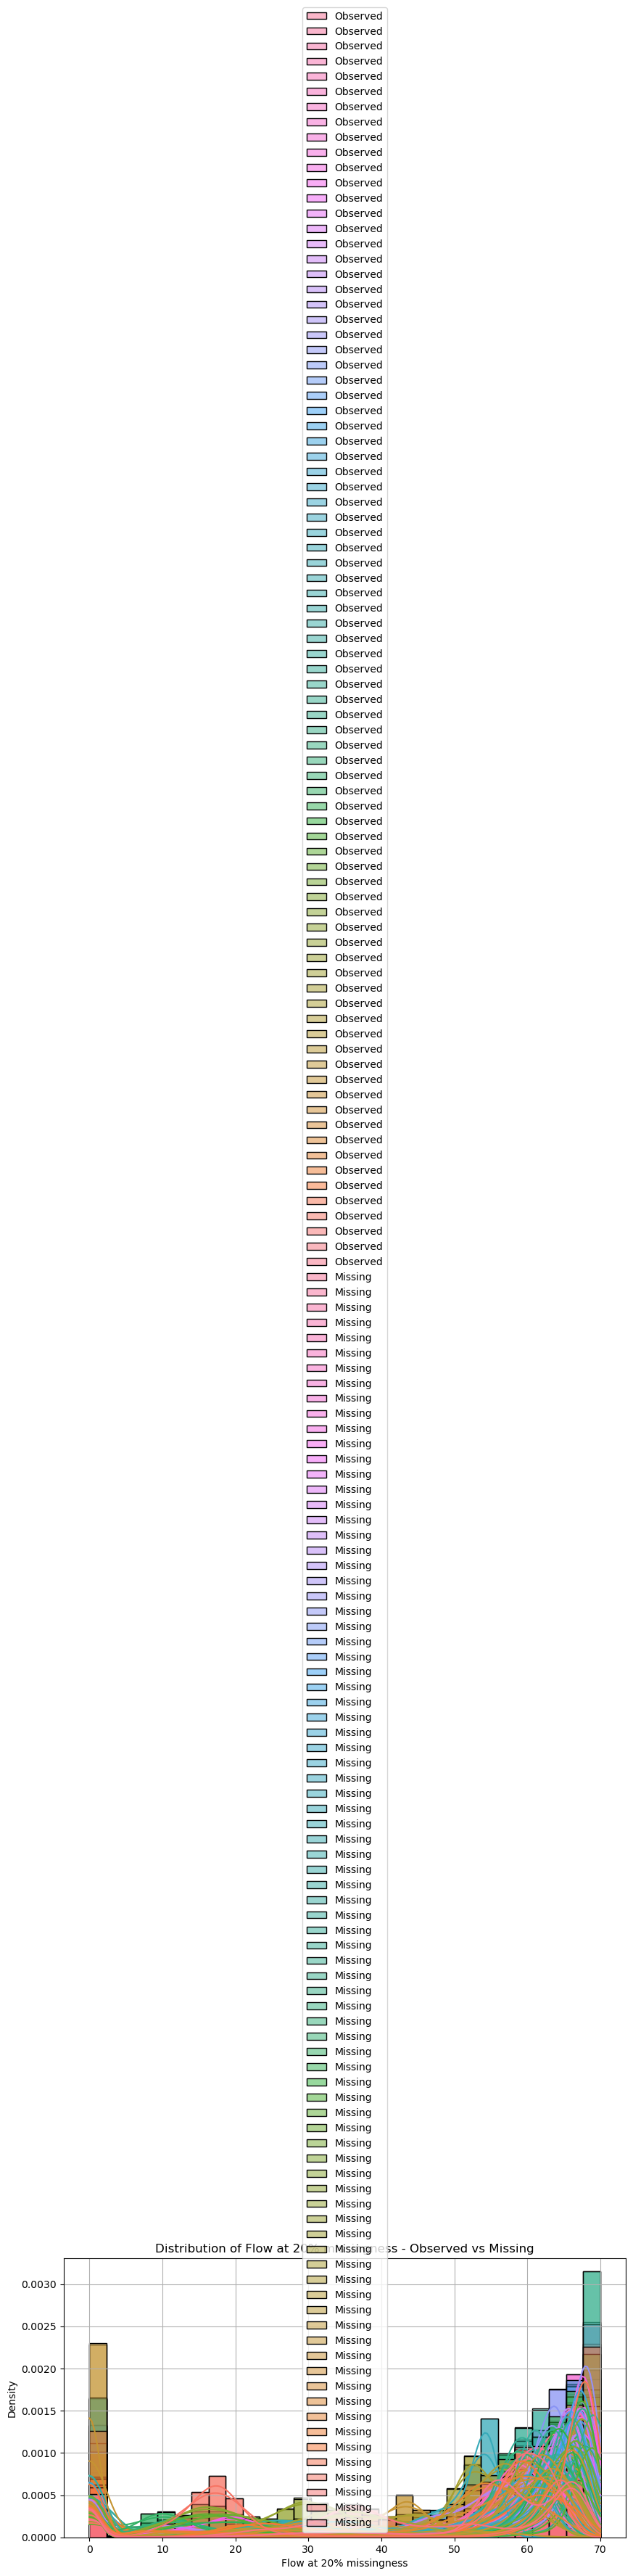

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def plot_missing_vs_observed(data, mask, feature_name="flow"):
    """
    data: 1D array of original values
    mask: 1D boolean array, True if missing
    feature_name: for labeling
    """
    data_missing = data[mask]
    data_observed = data[~mask]

    plt.figure(figsize=(10, 5))
    sns.histplot(data_observed, color='blue', label='Observed', kde=True, stat="density", bins=30)
    sns.histplot(data_missing, color='red', label='Missing', kde=True, stat="density", bins=30)
    plt.title(f"Distribution of {feature_name} - Observed vs Missing")
    plt.xlabel(feature_name)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_missing_vs_observed(X_val_full_unscaled[0], val_masks[0][90], feature_name="Flow at 20% missingness")

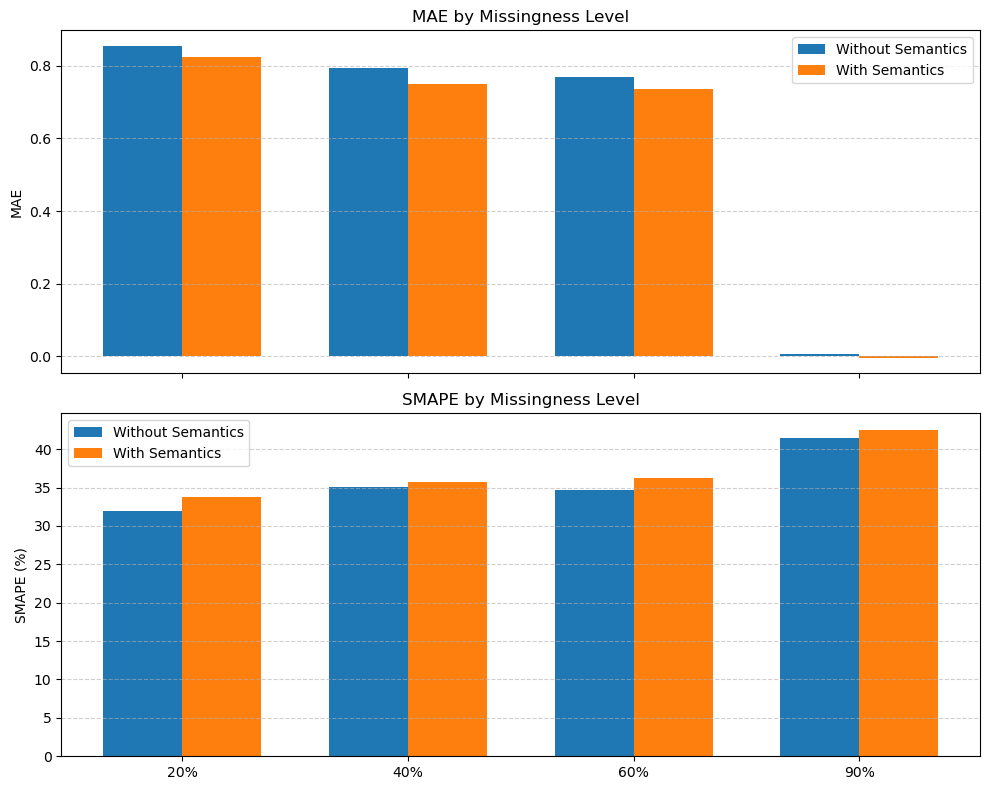

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example error values (replace with your real variables)
missing_levels = ['5%', '20%', '60%', '90%']

# Bar chart setup
x = np.arange(len(missing_levels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# --- MAE plot ---
ax[0].bar(x - width/2, r2_all.values(), width, label='Without Semantics', color='tab:blue')
ax[0].bar(x + width/2, avg_r2_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[0].set_ylabel('MAE')
ax[0].set_title('MAE by Missingness Level')
ax[0].legend()
ax[0].grid(True, axis='y', linestyle='--', alpha=0.6)

# --- SMAPE plot ---
ax[1].bar(x - width/2, smape_all.values(), width, label='Without Semantics', color='tab:blue')
ax[1].bar(x + width/2, avg_smape_cluster.values(), width, label='With Semantics', color='tab:orange')
ax[1].set_ylabel('SMAPE (%)')
ax[1].set_title('SMAPE by Missingness Level')
ax[1].set_xticks(x)
ax[1].set_xticklabels(missing_levels)
ax[1].legend()
ax[1].grid(True, axis='y', linestyle='--', alpha=0.6)

fig.tight_layout()
plt.show()
